<a href="https://colab.research.google.com/github/Ebl14/senales_y_sistemas/blob/main/ejercicio_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

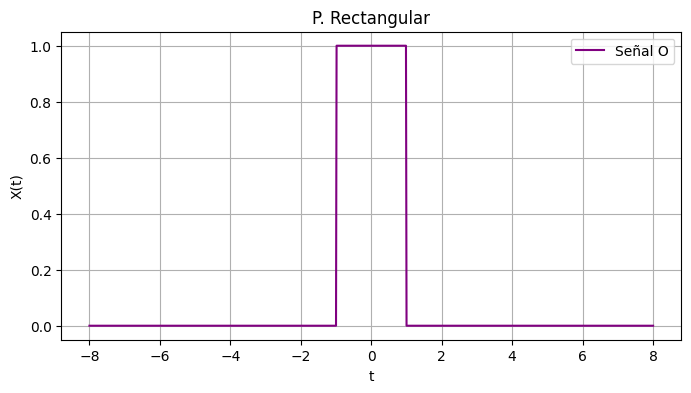

In [15]:
# Importar librerías necesarias
import numpy as np                  # Biblioteca para operaciones numéricas
import matplotlib.pyplot as plt     # Biblioteca para graficar

# Definición de parámetros de la señal
amplitud = 1                        # Amplitud del pulso rectangular
ancho_pulso = 2                     # Ancho del pulso (tau)
periodo = 4                         # Periodo de la señal periódica
frecuencia_angular = 2 * np.pi / periodo   # Frecuencia angular fundamental
tiempo = np.linspace(-2*periodo, 2*periodo, 1000)  # Vector de tiempo para graficar varias repeticiones del pulso

# Definición de la señal original: un pulso rectangular centrado en t=0
senal_rectangular = amplitud * ((tiempo >= -ancho_pulso/2) & (tiempo <= ancho_pulso/2)).astype(float)

# Función para calcular el coeficiente a0 de la serie de Fourier (término DC)
def coeficiente_a0():
    return (1 / periodo) * amplitud * ancho_pulso  # Integral del pulso sobre un periodo

# Función para calcular los coeficientes an (términos de coseno)
def coeficiente_an(n):
    return (2 * amplitud / (n * np.pi)) * np.sin(n * np.pi * ancho_pulso / periodo)

# Función para los coeficientes bn (términos de seno) - son cero porque la señal es par
def coeficiente_bn(n):
    return 0  # No hay componentes senoidales en la señal par

# Número de términos a usar en la serie de Fourier
numero_terminos = 20

# Vector con los valores de n desde 1 hasta numero_terminos
valores_n = np.arange(1, numero_terminos + 1)

# Calcular los coeficientes an para cada n
valores_an = np.array([coeficiente_an(n) for n in valores_n])

# Graficar la señal original
plt.figure(figsize=(8, 4))                                 # Tamaño de la figura
plt.plot(tiempo, senal_rectangular, label='Señal O', color='purple')  # Graficar el pulso
plt.title('P. Rectangular')                             # Título de la gráfica
plt.xlabel('t')                                            # Etiqueta del eje x
plt.ylabel('X(t)')                                         # Etiqueta del eje y
plt.grid(True)                                             # Mostrar la cuadrícula
plt.legend()                                               # Mostrar la leyenda
plt.show()                                                 # Mostrar la gráfica


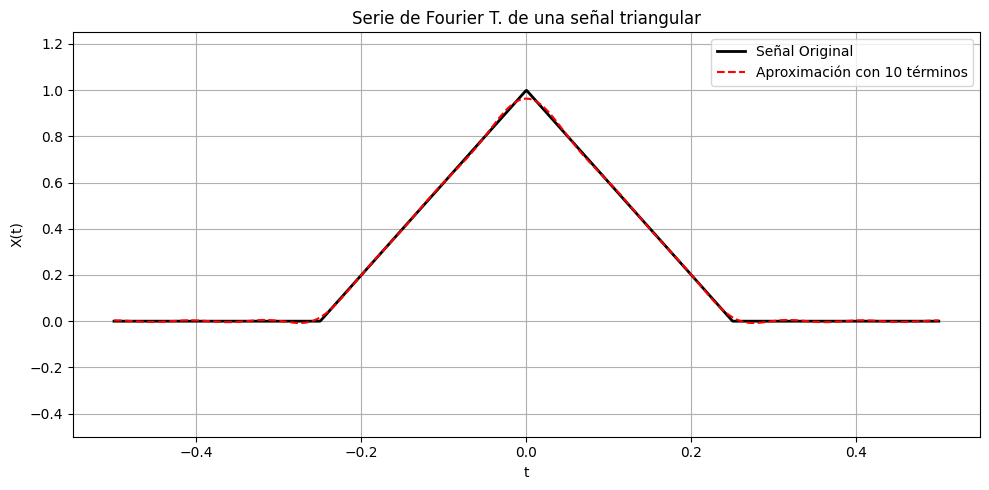

In [16]:
import numpy as np                          # Importa NumPy para manejo numérico
import matplotlib.pyplot as plt             # Importa Matplotlib para graficar
from sympy import symbols, integrate, cos, pi, simplify, lambdify  # Funciones simbólicas

# Parámetros de la señal
T = 1                                       # Periodo (antes era tau_val)
A = 1                                       # Amplitud (antes era B_val)

# Declaración de variables simbólicas
tiempo, indice, periodo, amplitud = symbols('tiempo indice periodo amplitud', real=True)

# Definición de la señal triangular por tramos
tramo_izq = (4 * amplitud / periodo) * (tiempo + periodo / 4)     # Tramo izquierdo: [-T/4, 0]
tramo_der = (-4 * amplitud / periodo) * (tiempo - periodo / 4)    # Tramo derecho: [0, T/4]

# Cálculo del coeficiente a0 (término constante de la serie)
coef_a0 = (2 / periodo) * (
    integrate(tramo_izq, (tiempo, -periodo / 4, 0)) +
    integrate(tramo_der, (tiempo, 0, periodo / 4))
)

# Cálculo del coeficiente an (sólo cosenos porque es par)
coef_an = (2 / periodo) * (
    integrate(tramo_izq * cos(2 * pi * indice * tiempo / periodo), (tiempo, -periodo / 4, 0)) +
    integrate(tramo_der * cos(2 * pi * indice * tiempo / periodo), (tiempo, 0, periodo / 4))
)

# Sustitución de valores concretos en los coeficientes
valor_a0 = coef_a0.subs({periodo: T, amplitud: A})
expresion_an = simplify(coef_an.subs({periodo: T, amplitud: A}))

# Se convierte an a una función numérica con lambdify
funcion_an = lambdify(indice, expresion_an, modules=["numpy"])

# Número de términos para la aproximación de Fourier
num_terminos = 10
valores_n = np.arange(1, num_terminos + 1)                      # n = 1, 2, ..., N
valores_an = np.array([funcion_an(k) for k in valores_n])      # Calcula an para cada n

# Valores del tiempo para graficar
tiempo_discreto = np.linspace(-T / 2, T / 2, 1000)

# Inicializa la señal aproximada con a0/2
senal_aproximada = np.full_like(tiempo_discreto, float(valor_a0) / 2)

# Construcción de la serie de Fourier suma de cosenos
for i, valor_an in enumerate(valores_an, start=1):
    senal_aproximada += valor_an * np.cos(2 * np.pi * i * tiempo_discreto / T)

# Función por tramos de la señal original
def senal_original(t_array):
    resultado = np.zeros_like(t_array)
    for i, t_i in enumerate(t_array):
        if -T / 4 <= t_i < 0:
            resultado[i] = (4 * A / T) * (t_i + T / 4)
        elif 0 <= t_i <= T / 4:
            resultado[i] = (-4 * A / T) * (t_i - T / 4)
    return resultado

# Evaluar la señal original
senal_real = senal_original(tiempo_discreto)

# Gráfica comparativa
plt.figure(figsize=(10, 5))  # Tamaño de figura
plt.plot(tiempo_discreto, senal_real, label='Señal Original', color = 'black', linewidth=2)
plt.plot(tiempo_discreto, senal_aproximada, '--', label=f'Aproximación con {num_terminos} términos', color = 'red')
plt.title('Serie de Fourier T. de una señal triangular')
plt.xlabel('t')
plt.ylabel('X(t)')
plt.ylim(-0.5, 1.25)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
